<a href="https://colab.research.google.com/github/jainaryan644/MAT-422/blob/main/HW2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.2.1. Probability axioms

In [10]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, uniform

In [3]:
'''
Probability Axioms describe 3 properties referred to as Kolmogorov's
Axioms.
Sample Space Ω: The set of all possible outcomes of an experiment.
Event: A subset of the sample space.
Probability Measure P: A function that assigns a probability

Non-negativity axiom: P(A) ≥ 0
Normalization Axiom: P(Ω) = 1
Additivity Axiom: P(A ∪ B) = P(A) + P(B) if A∩B = ∅

Consequences of the Axioms:
Probability of the Empty Set: P(∅) = 0
Probability of the Complement: P(A^c) = 1 - P(A)
General Addition Rule: P(A ∪ B) = P(A) + P(B) - P(A ∩ B)
Finite Additivity: P(A11∪A2∪...∪An) = P(A1) + P(A2) + ... + P(An)
Law of Total Probability: P(A) = P(A∩B1) + P(A∩B2) + ... + P(A∩Bn)
'''


sample_space = [1, 2, 3, 4, 5, 6]

def probability_of_event(event):
    total_outcomes = len(sample_space)
    favorable_outcomes = len(event)
    return favorable_outcomes / total_outcomes


event_1 = [1]
prob_event_1 = probability_of_event(event_1)
print(f"Probability of event {event_1}: {prob_event_1} (Non-Negativity)")

prob_sample_space = probability_of_event(sample_space)
print(f"Probability of sample space: {prob_sample_space} (Normalization)")

event_1 = [1]
event_2 = [2]
prob_event_1 = probability_of_event(event_1)
prob_event_2 = probability_of_event(event_2)
prob_union_event_1_2 = probability_of_event(event_1 + event_2)
print(f"Probability of event {event_1} ∪ {event_2}: {prob_union_event_1_2} (Additivity)")
print(f"P({event_1} ∪ {event_2}) = P({event_1}) + P({event_2}) → {prob_event_1} + {prob_event_2} = {prob_event_1 + prob_event_2}")




Probability of event [1]: 0.16666666666666666 (Non-Negativity)
Probability of sample space: 1.0 (Normalization)
Probability of event [1] ∪ [2]: 0.3333333333333333 (Additivity)
P([1] ∪ [2]) = P([1]) + P([2]) → 0.16666666666666666 + 0.16666666666666666 = 0.3333333333333333


2.2.2. Conditional probability

In [5]:
'''
Conditional probability is the probability of an event occurring,
given that another event has already occurred. It allows us to
update our probability assessments based on new information or evidence.
The key idea is that the likelihood of one event may depend on the occurrence of another event.

P(A|B) = P(A∩B) / P(B), provided that P(B)>0
P(A|B) = probability of A given B
P(A∩B) = probability of both A and B
P(B) = probability of B
'''

#Example of conditional probability using "cards"

total_cards = 52
face_cards = 12
kings = 4

P_face_card = face_cards / total_cards

P_king = kings / total_cards

P_king_given_face_card = P_king / P_face_card

print(f"Probability of drawing a face card: {P_face_card}")
print(f"Probability of drawing a king: {P_king}")
print(f"Conditional probability of drawing a king given that it's a face card: {P_king_given_face_card}")


Probability of drawing a face card: 0.23076923076923078
Probability of drawing a king: 0.07692307692307693
Conditional probability of drawing a king given that it's a face card: 0.3333333333333333


2.2.3. Discrete random variables


In [8]:
'''
A discrete random variable is a random variable that can take on a
countable number of distinct values used to describe outcomes of a random
process or experiment. Examples include rolling a die, flipping a coin,
or counting the number of heads in several coin tosses.

Characteristics:
1. Countable outcomes
2. Follows Probability Mass Function:
∑ = P(X = x) = 1
x

3. Finite Countable Infinite Sample Space
4. Expectation and Variance
'''

#Example of rolling six-sided die
sample_space = [1, 2, 3, 4, 5, 6]
def pmf(x):
    if x in sample_space:
        return 1 / 6
    else:
        return 0

num_trials = 1000
outcomes = [random.choice(sample_space) for _ in range(num_trials)]
frequency = {x: outcomes.count(x) for x in sample_space}

empirical_probabilities = {x: frequency[x] / num_trials for x in sample_space}

print("Outcome | Theoretical Probability | Empirical Probability")
for x in sample_space:
    print(f"{x}       | {pmf(x):.2f}                 | {empirical_probabilities[x]:.2f}")


Outcome | Theoretical Probability | Empirical Probability
1       | 0.17                 | 0.16
2       | 0.17                 | 0.18
3       | 0.17                 | 0.16
4       | 0.17                 | 0.17
5       | 0.17                 | 0.17
6       | 0.17                 | 0.16


2.2.4. Continues random variables

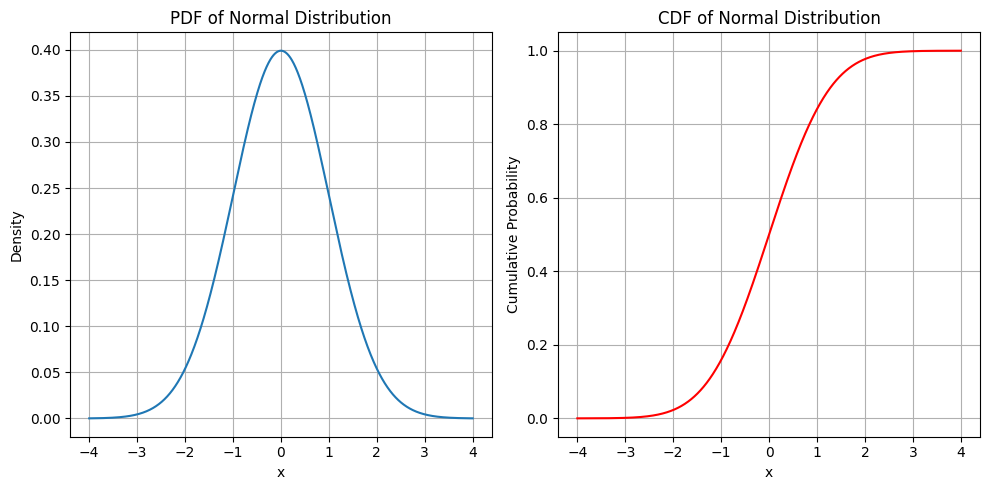

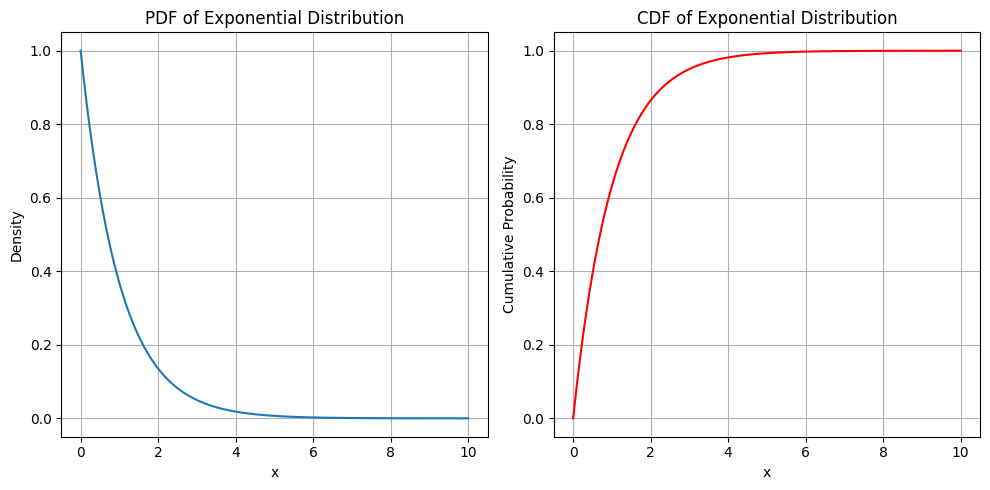

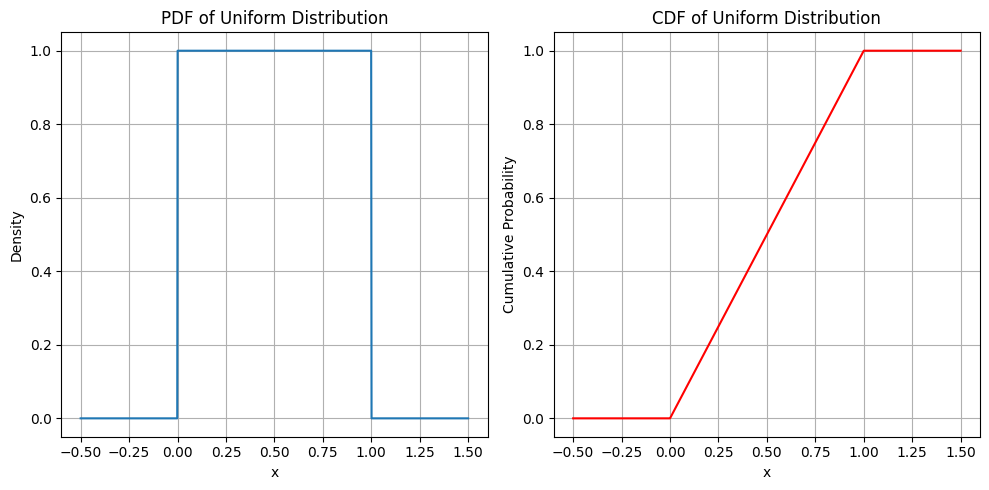

In [11]:
 '''
  Unlike discrete random variables, continuous random variables
  can assume an infinite number of possible values
  over an interval of real numbers.

  Characteristics:
  1. Infinite Number of Possible Values
  2. Probability Density Function
  P (a≤X≤b) = ∫a^b f(x) dx

  3. Cumulative Distribution Function: provides cumulative probability
  up to a certain value
  F(x) = P(X≤x) = -∫∞^x f(t) dt

  4. Expectation and Variance:
  E(X) = ∫-∞^∞ x f(x) dx
  Var(X) = E(X^2) - (E(X))^2 = ∫-∞^∞ (x - E(X))^2 f(x) dx
 '''

 # Example 1: Normal (Gaussian) Distribution
def normal_distribution():
    mu = 0
    sigma = 1

    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

    pdf = norm.pdf(x, mu, sigma)
    cdf = norm.cdf(x, mu, sigma)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(x, pdf, label=f'Normal PDF (mu={mu}, sigma={sigma})')
    plt.title('PDF of Normal Distribution')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(x, cdf, label=f'Normal CDF (mu={mu}, sigma={sigma})', color='red')
    plt.title('CDF of Normal Distribution')
    plt.xlabel('x')
    plt.ylabel('Cumulative Probability')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Example 2: Exponential Distribution
def exponential_distribution():
    lam = 1.0
    x = np.linspace(0, 10, 1000)
    pdf = expon.pdf(x, scale=1/lam)
    cdf = expon.cdf(x, scale=1/lam)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(x, pdf, label=f'Exponential PDF (lambda={lam})')
    plt.title('PDF of Exponential Distribution')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(x, cdf, label=f'Exponential CDF (lambda={lam})', color='red')
    plt.title('CDF of Exponential Distribution')
    plt.xlabel('x')
    plt.ylabel('Cumulative Probability')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Example 3: Uniform Distribution
def uniform_distribution():
    a, b = 0, 1
    x = np.linspace(-0.5, 1.5, 1000)
    pdf = uniform.pdf(x, loc=a, scale=b-a)
    cdf = uniform.cdf(x, loc=a, scale=b-a)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(x, pdf, label=f'Uniform PDF (a={a}, b={b})')
    plt.title('PDF of Uniform Distribution')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(x, cdf, label=f'Uniform CDF (a={a}, b={b})', color='red')
    plt.title('CDF of Uniform Distribution')
    plt.xlabel('x')
    plt.ylabel('Cumulative Probability')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


normal_distribution()
exponential_distribution()
uniform_distribution()